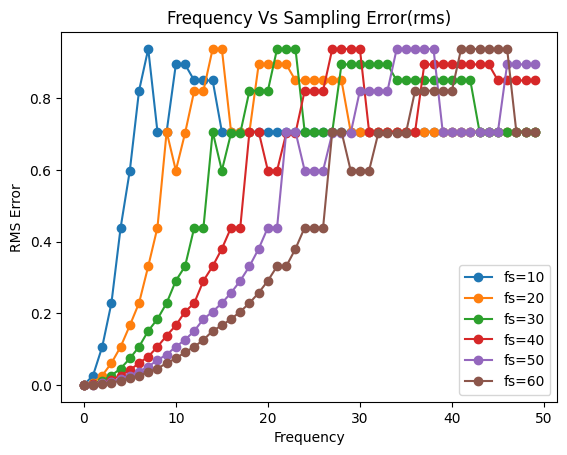

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import openpyxl
def error(f,fs):  #function inputs:frequency,sampling frequency Output: rms error 
    l=5/f  #to take only 5 cycle for calculation

    t1=np.linspace(0,l,round(fs*l))  #for sampling at fs 
    s1=np.sin(2*np.pi*f*t1)   

    t2=np.linspace(0,l,500)   
    s2=np.sin(2*np.pi*f*t2)

    s3=np.zeros(500)  #declaring an dummy array
    for i in range(500) :
        s3[i]=np.interp(t2[i], t1, s1)  #linear interpolation 

    diff=s3-s2   #diff is the instanteneous error
    rms_error = np.sqrt(np.mean(diff**2))
    #print('error=',rms_error)
    return rms_error

sample=np.arange(1,7,1)
samer=np.zeros((50,7))
for sam in sample:
    er=np.zeros(50)
    fe=np.arange(1,50,1)
    for j in fe:
        er[j]=error(j,sam*10)
        samer[j,sam]=er[j]
    fe=np.arange(0,50,1)
    plt.plot(fe,er,'o-',label=f"fs={sam*10}")

plt.xlabel("Frequency")
plt.ylabel("RMS Error")
plt.title("Frequency Vs Sampling Error(rms)")
plt.legend()

for i in range(50):
    samer[i,0]=fe[i]

# export to excel
wb = openpyxl.Workbook()
ws = wb.active
ws['A1'] = 'Frequency'
for i, sam in enumerate(sample):
    ws.cell(row=1, column=i+2, value=f'Error Fs={sam*10}')

for i in range(50):
    for j in range(7):
        cell = ws.cell(row=i+2, column=j+1)
        cell.value = samer[i, j]

wb.save('FreqSampErrorV2.xlsx')